In [2]:
!pip install pandas


     |████████████████████████████████| 10.5 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 16.0 MB 3.2 MB/s eta 0:00:01     |███████▍                        | 3.7 MB 11.5 MB/s eta 0:00:02
     |████████████████████████████████| 510 kB 4.9 MB/s eta 0:00:01


In [3]:
import pandas as pd
import numpy as np

In [4]:
dataset=pd.read_csv('car data.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
dataset.shape


(301, 9)

In [7]:
# we have 301 datapoints and 9 features.
# Let us check the info and description of dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# There are no missing values

dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [23]:
# Numerical vs non-numerical columns

# 1. Numerical columns: 

num_Cols=[]
for i in dataset.columns:
    if ((dataset[i].dtypes!='O') and (i!='Year')):
        num_Cols.append(i)
print('Numerical columns: ',num_Cols)

# 2. Date Cols: Year
date_col=['Year']
print('Date Columns: ',date_col)
# 3. Catgorical columns
cat_cols=[]
for i in dataset.columns:
    if ((dataset[i].dtypes=='O') and (i!='Year')):
        cat_cols.append(i)
print('Categorical Columns: ',cat_cols)

Numerical columns:  ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
Date Columns:  ['Year']
Categorical Columns:  ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [51]:
# Find out the unique value for each of the columns

unique_dict={}
columns=[]
num_unique_values=[]
unique_values=[]
for col in dataset.columns:
    columns.append(col)
    num_unique_values.append(dataset[col].nunique())
    unique_dict['columns']=columns
    unique_dict['num_unique_values']=num_unique_values
    for i in columns:
        unique_values.append(dataset[col].unique())
        unique_dict['unique_values']=unique_values
 
unique_dict
    


{'columns': ['Car_Name',
  'Year',
  'Selling_Price',
  'Present_Price',
  'Kms_Driven',
  'Fuel_Type',
  'Seller_Type',
  'Transmission',
  'Owner'],
 'num_unique_values': [98, 16, 156, 147, 206, 3, 2, 2, 3],
 'unique_values': [array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
         's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
         '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
         'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
         'camry', 'land cruiser', 'Royal Enfield Thunder 500',
         'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
         'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
         'Royal Enfield Thunder 350', 'KTM 390 Duke ',
         'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
         'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
         'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
         'Yamaha FZ S V 2.0', 'Yamaha FZ

In [52]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [55]:
final_Df=dataset[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [56]:
final_Df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [57]:
# We need a column to show the age of each datapoint (car)

final_Df['age_of_car']=2021-final_Df['Year']

In [58]:
final_Df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [59]:
final_Df.drop(['Year'],axis=1,inplace=True)

In [60]:
final_Df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [62]:
# Convert categorical to numerical using get_dummies()

Fuel_Type_num=pd.get_dummies(final_Df['Fuel_Type'])
Fuel_Type_num

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [63]:
# To prevent dummy variable trap ie, all the independent variables: CNG,Diesel and Petrol are multicollinear that is
# any one vatiable can be predicted using others. To come out of this trap, we drop the first column of get_dummies()
# output

Fuel_Type_num=pd.get_dummies(final_Df['Fuel_Type'],drop_first=True)
Fuel_Type_num


,Diesel,Petrol
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
296,1,0
297,0,1
298,0,1
299,1,0


In [65]:
# We can do this on whole dataset.

final_Df=pd.get_dummies(final_Df,drop_first=True)
final_Df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [66]:
final_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   age_of_car              301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [67]:
final_Df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,7.372093,0.199336,0.794020,0.352159,0.867110
std,5.082812,8.644115,38886.883882,0.247915,2.891554,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.320000,500.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,6.400000,32000.000000,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,9.900000,48767.000000,0.000000,9.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,92.600000,500000.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
#all the columns are converted to numerical values and hence is ready for checking collinearity
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns


     |████████████████████████████████| 7.2 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 165 kB/s eta 0:00:011
     |████████████████████████████████| 2.8 MB 16.5 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
     |████████████████████████████████| 30.8 MB 14.8 MB/s eta 0:00:01   |██████                          | 5.7 MB 2.1 MB/s eta 0:00:12     |█████████████████▊              | 17.0 MB 3.1 MB/s eta 0:00:05     |███████████████████▊            | 18.9 MB 3.1 MB/s eta 0:00:04


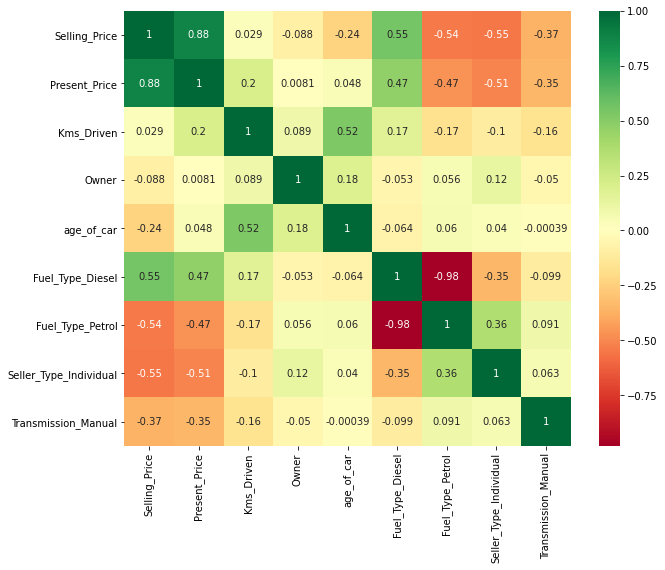

In [78]:
 plt.figure(figsize=(10,8)) 
#plot heat map 
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

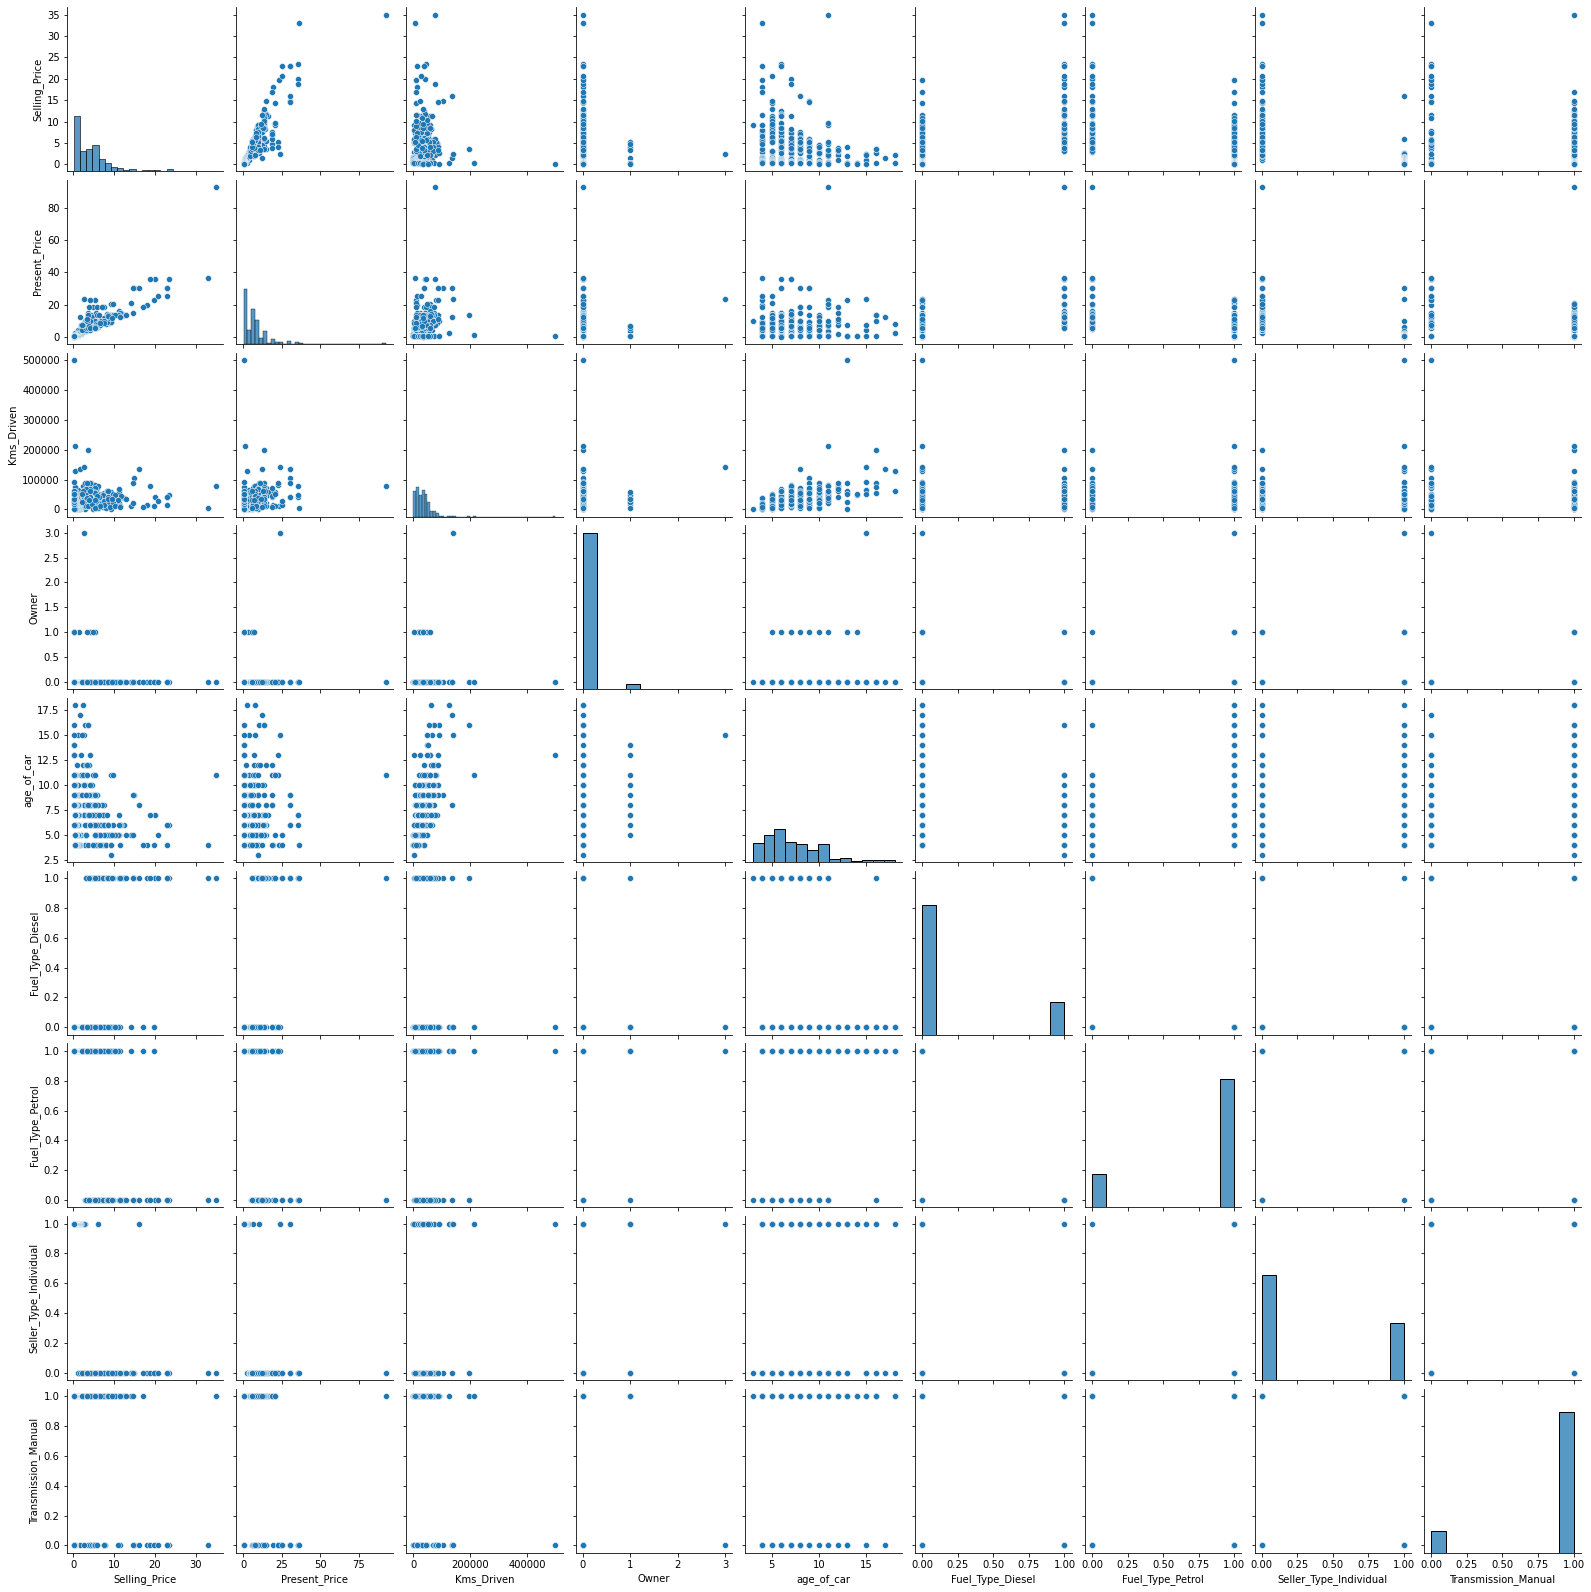

In [73]:
sns.pairplot(final_Df)

In [79]:
#Target Variable: Selling Price
# Predictor Variables: All other columns

# From the heatmap, selling price and present price is highly positively correlated and also shows linear relationship.
# We can build linear regression model



In [80]:
# Separate target and predictors

X=final_Df.iloc[:,1:]
y=final_Df.iloc[:,0]

In [81]:
X.head()

,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [82]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [83]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
     |████████████████████████████████| 7.2 MB 3.4 MB/s eta 0:00:01
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
     |████████████████████████████████| 303 kB 12.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=d78148a57ecba9ddb3d27049fa39765f05bd706a813ecbfce4ef4f0fee2303e9
  Stored in directory: /Users/mamul/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [87]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor


In [88]:
model=ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [93]:
print(model.feature_importances_)

[3.60757140e-01 4.40569707e-02 3.43862172e-04 7.81578402e-02
 2.40428477e-01 1.09525278e-02 1.26057924e-01 1.39245258e-01]


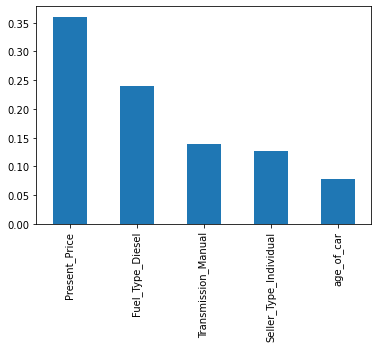

In [97]:
feature_imp=pd.Series(model.feature_importances_,index=X.columns)
feature_imp.nlargest(5).plot(kind='bar')
plt.show()

In [98]:
# train_test_split
from sklearn.model_selection import train_test_split



In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [100]:
X_train.head()

,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
235,9.40,15141,0,4,0,1,0,1
62,35.96,78000,0,7,1,0,0,0
38,3.76,10079,0,5,0,1,0,1
124,1.75,11500,0,9,0,1,1,1
165,0.54,500,0,5,0,1,1,0


In [101]:
y_train.head()

235     9.10
62     18.75
38      3.00
124     0.95
165     0.45
Name: Selling_Price, dtype: float64

## Random Forest Regressor for modelling

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rf_random=RandomForestRegressor()

In [107]:
#Hyperparameters  Tuning
#n_estimators: Number of tress in the forest

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

#max_features: number of features to consider when looking for the best split
max_features=['auto','sqrt']

#max_depth: maximum depth of the tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
print(max_depth)

#Minimum number of samples required at each internal node
min_samples_leaf= [2,5,10,15,50,100]

# Minimum number of samples required at each leaf node
min_smaples_split=[1,2,5,10]



[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
[5, 10, 15, 20, 25, 30]


In [108]:
# Perform Hyperparameter tuning using RandomizedSearch CV
# Find out best hyperparameters 
from sklearn.model_selection import RandomizedSearchCV

In [110]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'min_samples_split':min_smaples_split}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [2, 5, 10, 15, 50, 100], 'min_samples_split': [1, 2, 5, 10]}


In [111]:
rf=RandomizedSearchCV(estimator=rf_random,param_distributions=random_grid,scoring='neg_mean_squared_error',
                     n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [112]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=700; total time=   0.9s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=700; total time=   0.7s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=700; total time=   0.9s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=700; total time=   0.6s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=900; total time=   4.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100; total time=   6.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1100; total time=   5.7s
[CV] END max_depth=

/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=50, min_samples_split=1, n_estimators=700; total time=   0.3s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=50, min_samples_split=1, n_estimators=700; total time=   0.4s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=50, min_samples_split=1, n_estimators=700; total time=   0.4s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=50, min_samples_split=1, n_estimators=700; total time=   0.4s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=50, min_samples_split=1, n_estimators=700; total time=   0.3s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=1, n_estimators=1000; total time=   0.5s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=1, n_estimators=1000; total time=   0.7s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=1, n_estimators=1000; total time=   0.6s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=1, n_estimators=1000; total time=   0.7s


/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/joblib/parallel

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=1, n_estimators=1000; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=1100; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=1100; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=1100; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=1100; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_feat

/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [         nan -29.36838106  -7.30932362 -29.3463429  -23.3844665
 -16.68630968          nan          nan -12.25952522  -3.04799587]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 15, 50,
                                                             100],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [117]:
predictions=rf.predict(X_test)

In [118]:
predictions

array([ 0.34759489,  1.09600316,  0.26343476,  0.20811289,  4.41689743,
        3.77088537,  6.23722311,  7.2515641 ,  3.12613792,  0.68262139,
        1.26093331,  5.57396137,  5.2179889 ,  2.66849827,  5.24497039,
        2.92567196,  1.20875861,  5.08980448,  2.68319791,  0.40391424,
        0.44023289, 10.00934227,  0.25542656,  0.3494105 ,  5.23625553,
        4.96454528,  1.09600316,  0.43643187,  3.58259768,  5.53909205,
       10.04028141,  4.51275572,  0.19670008,  7.708276  ,  5.38874877,
        4.59410279,  4.77661426, 12.99738541,  5.83384382,  1.27894941,
        5.76279291,  6.83474033,  3.7279973 ,  0.68480033, 21.6736975 ,
        0.67227505,  1.28282667,  6.5858903 ,  3.10988081,  1.27515999,
        0.38684215,  5.54696057,  5.3534399 ,  0.66335793,  0.2346217 ,
        8.03961372,  4.84080333,  7.03479688,  4.25509733,  3.30098845,
       10.7467632 ])

/opt/anaconda3/envs/CarDekho/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

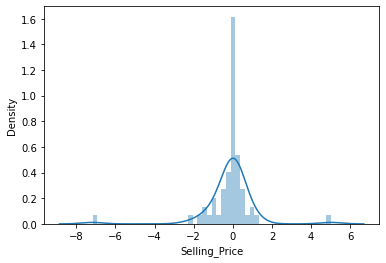

In [116]:
sns.distplot(y_test-predictions)

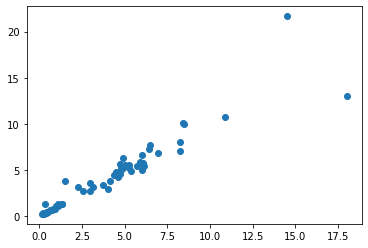

In [120]:
plt.scatter(y_test,predictions)

In [121]:
import pickle
#open a file, where you want to store the data
file=open('random_forest_regressor_model.pkl','wb')
#dump information to the file
pickle.dump(rf,file)